In [1]:
import torch
import pytorch_lightning as pl
from torch import nn
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.transforms import Grayscale


from VAE_conv3 import VAE
import os

/home/nirmal/anaconda3/envs/DLRG_lightening/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = '/home/nirmal/course_work/DLRG/nirmal/project/data/2D_square/'

In [3]:
transform = transforms.Compose([Grayscale(num_output_channels=1),transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5,))])

train_dataset = ImageFolder(root = os.path.join(data_dir, 'train'), transform=transform)
val_dataset = ImageFolder(root = os.path.join(data_dir, 'val'), transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [4]:
model = VAE()
trainer = pl.Trainer(max_epochs=2)
trainer.fit(model, val_loader, val_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 984 K 
1 | decoder | Decoder | 919 K 
------------------------------------
1.9 M     Trainable params
0         Non-trainable params
1.9 M     Total params
7.614     Total estimated model params size (MB)


Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:00<00:00, 10.71it/s]

/home/nirmal/anaconda3/envs/DLRG_lightening/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/home/nirmal/anaconda3/envs/DLRG_lightening/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/nirmal/anaconda3/envs/DLRG_lightening/lib/python3.10/site-packages/pytorch_lightning/trainer/trainer.py:1609: PossibleUserWarning: The number of training batches (32) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 1: 100%|██████████| 64/64 [00:08<00:00,  7.48it/s, loss=-4.15e+06, v_num=12]

`Trainer.fit` stopped: `max_epochs=2` reached.


Epoch 1: 100%|██████████| 64/64 [00:08<00:00,  7.45it/s, loss=-4.15e+06, v_num=12]


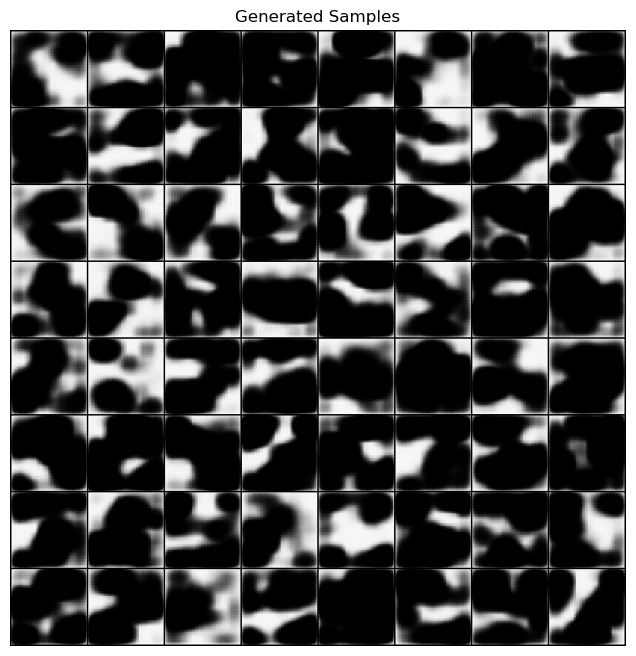

In [8]:
import torch
import torchvision.transforms as transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt

def generate_samples(model, num_samples=64, device='cpu'):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # No need to track gradients when generating samples
        # Generate latent vectors from a standard normal distribution
        z = torch.randn(num_samples, 16).to(device)

        # Generate images using the decoder
        samples = model.decoder(z)

        return samples

# Set the number of samples you want to generate
num_samples = 64

# Set the device to 'cuda' if you have a GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Move the model to the appropriate device
model.to(device)

# Generate samples using the trained VAE model
samples = generate_samples(model, num_samples, device)

# Convert the generated samples to a grid of images
grid = vutils.make_grid(samples, nrow=8, padding=2, normalize=True)

# Plot the generated images
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Generated Samples")
plt.imshow(transforms.ToPILImage()(grid.cpu()))
plt.show()


In [6]:
x, _ = next(iter(train_loader))
x.shape

torch.Size([32, 1, 101, 101])

In [7]:
x, _ = next(iter(train_loader))
mu, logvar = model.encoder(x)
print(x.shape)
print(mu.shape, logvar.shape)

z = model.reparameterize(mu, logvar)
print(z.shape)  

x_hat = model.decoder(z)
print(x_hat.shape)

torch.Size([32, 1, 101, 101])
torch.Size([32, 16]) torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 1, 101, 101])
